* easy: impute missing values in the age column
* medium: apply one-hot encoding
* hard: bin the age column

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv("train.csv", index_col=0)
df.shape

(891, 11)

<AxesSubplot:ylabel='PassengerId'>

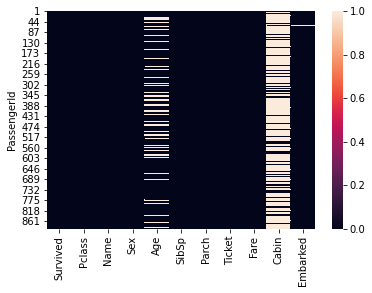

In [10]:
sns.heatmap(df.isna())

In [12]:
med_age = df["Age"].median()
med_age

28.0

In [13]:
df["Age"].fillna(med_age, inplace=True)

<AxesSubplot:ylabel='PassengerId'>

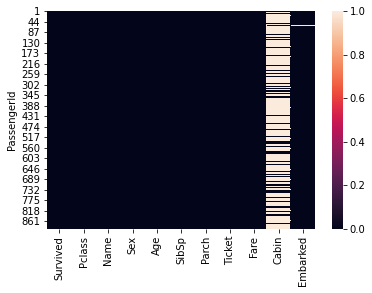

In [14]:
sns.heatmap(df.isna())

In [21]:
df["Age"].value_counts().tail(30)


71.00    2
59.00    2
63.00    2
0.83     2
30.50    2
70.00    2
57.00    2
0.75     2
13.00    2
10.00    2
64.00    2
40.50    2
32.50    2
45.50    2
20.50    1
24.50    1
0.67     1
14.50    1
0.92     1
74.00    1
34.50    1
80.00    1
12.00    1
36.50    1
53.00    1
55.50    1
70.50    1
66.00    1
23.50    1
0.42     1
Name: Age, dtype: int64

In [22]:
onehot = pd.get_dummies(df['Age']) #--> DF
onehot.head()

df2 = pd.concat([df, onehot], axis = 1)
df2.shape

(891, 99)

In [33]:
q = pd.cut(df['Age'], bins=[0,1,13,20,30, 60, 100], labels = ["babies", "children", "teenagers", "young adults", "adults", "seniors"])
q.value_counts()

adults          283
young adults    230
teenagers       108
children         57
seniors          22
babies           14
Name: Age, dtype: int64

In [38]:
onehot_age = pd.get_dummies(q)
onehot_age.head()

df3 = pd.concat([df, onehot_age], axis = 1)
df3.shape


(891, 17)

In [40]:
df3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,babies,children,teenagers,young adults,adults,seniors
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0,1,0
